<a href="https://colab.research.google.com/github/joemakary/Machine-Learning/blob/main/Clustering_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GUC Clustering Project

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Objective:**
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student:
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional)
* How to evaluate clustering approachs
* How to display the output
* What is the effect of normalizing the data

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas




In [ ]:
# if plotnine is not installed in Jupter then use the following command to install it


Running this project require the following imports

In [27]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *
# StandardScaler is a function to normalize the data
# You may also check MinMaxScaler and MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

In [3]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using



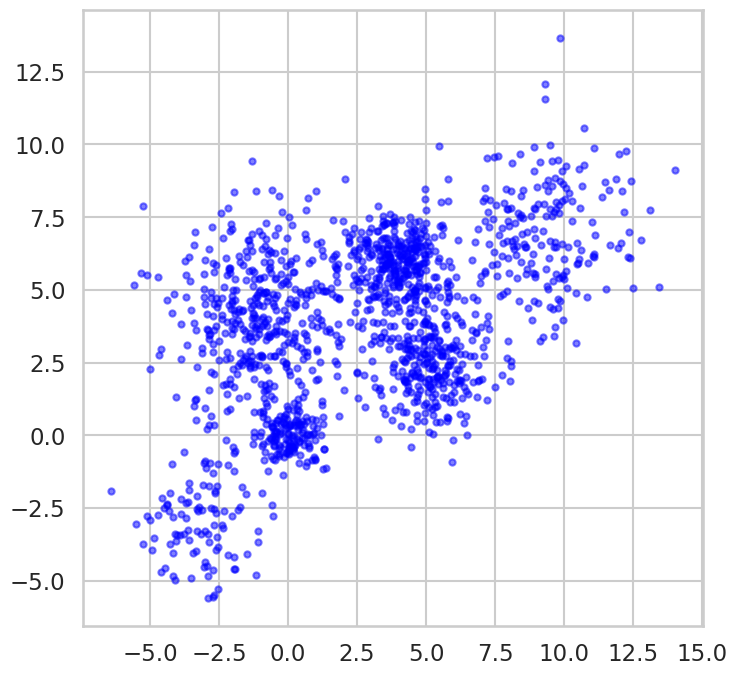

In [4]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

### Kmeans
* Use Kmeans with different values of K to cluster the above data
* Display the outcome of each value of K
* Plot distortion function versus K and choose the approriate value of k
* Plot the silhouette_score versus K and use it to choose the best K
* Store the silhouette_score for the best K for later comparison with other clustering techniques.

In [39]:
def kmeans(data):
  distortions = []
  silhouette_scores = []
  K_values = range(2, 11)  # You can adjust the range of K values as needed

  for k in K_values:
      kmeans = KMeans(n_clusters=k, random_state=42)
      kmeans.fit(data)
      distortions.append(kmeans.inertia_)  # Store distortion
      if k > 1:
          silhouette_scores.append(silhouette_score(data, kmeans.labels_))  # Store silhouette score
      else:
          silhouette_scores.append(0)  # Silhouette score is not defined for k=1
  plt.plot(K_values, distortions, 'bx-')
  plt.xlabel('K')
  plt.ylabel('Distortion')
  plt.title('Distortion versus K')
  plt.show()
  plt.plot(K_values, silhouette_scores, 'bx-')
  plt.xlabel('K')
  plt.ylabel('Silhouette Score')
  plt.title('Silhouette Score versus K')
  plt.show()


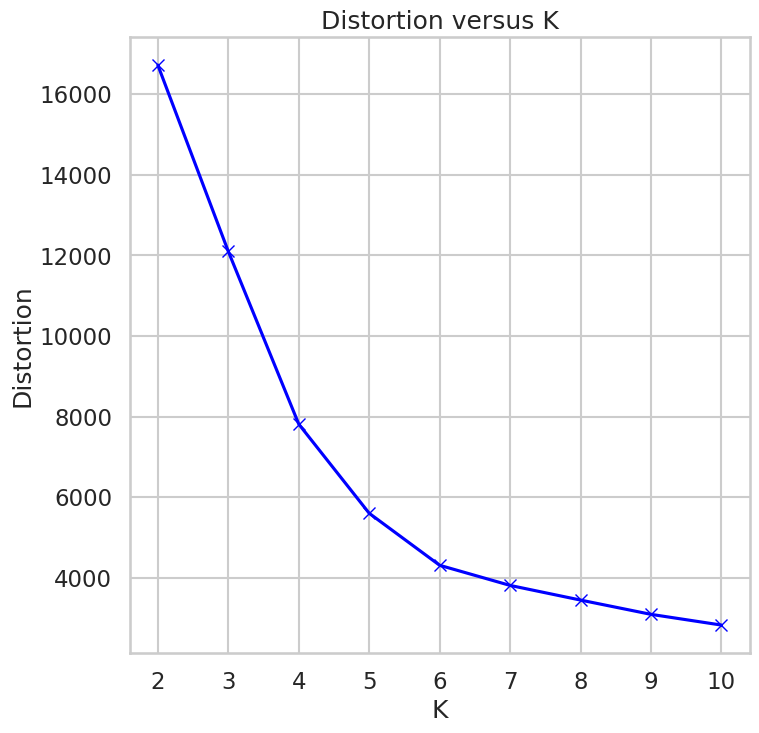

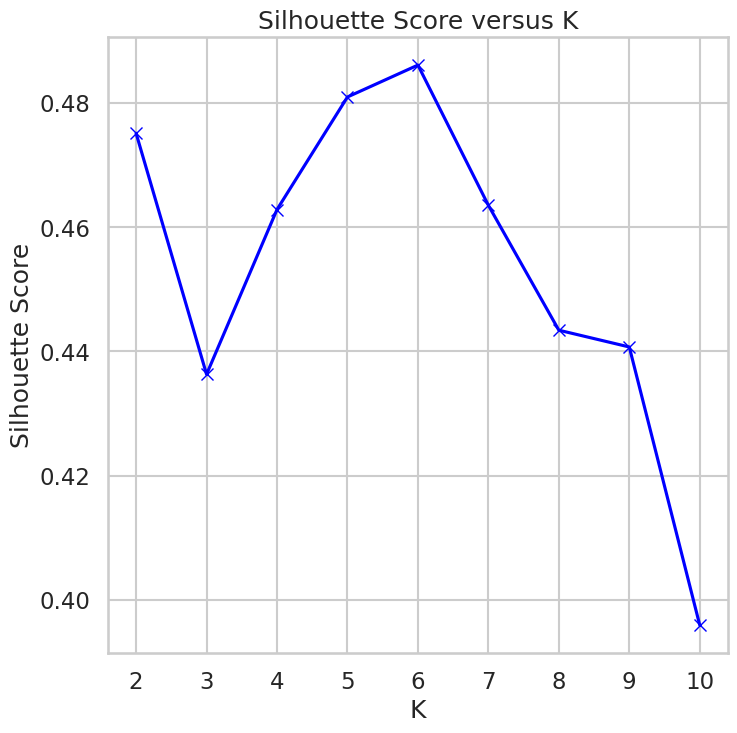

In [9]:
kmeans(Multi_blob_Data)

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data
* In the  AgglomerativeClustering change the following parameters
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques.
* Record your observation

In [11]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

def hclustering(data):
  silhouette_scores_2 = []
  observations = []

  # Define the parameters to explore
  affinities = ['euclidean', 'cityblock', 'cosine']
  linkages = ['average', 'single']
  distance_thresholds = [None, 10, 20]  # Adjust as needed

  # Loop through different parameter combinations
  for affinity in affinities:
      for linkage_method in linkages:
          for distance_threshold in distance_thresholds:
              # Perform Agglomerative Clustering
              if distance_threshold is not None:
                  model = AgglomerativeClustering(n_clusters=None, affinity=affinity, linkage=linkage_method, distance_threshold=distance_threshold)
              else:
                  model = AgglomerativeClustering(n_clusters=2, affinity=affinity, linkage=linkage_method)
              clusters = model.fit_predict(data)

              # Calculate silhouette score
              if len(np.unique(clusters)) > 1:  # Silhouette score requires at least 2 clusters
                  score = silhouette_score(data, clusters)
              else:
                  score = -1  # Set score to -1 if only one cluster formed

              silhouette_scores_2.append(score)

              # Record observations
              observations.append({
                  'Affinity': affinity,
                  'Linkage': linkage_method,
                  'Distance Threshold': distance_threshold,
                  'Silhouette Score': score,
                  'Clusters': clusters
              })

              # Plot dendrogram
              if distance_threshold is None:
                  plt.figure(figsize=(10, 6))
                  dendrogram(linkage(Multi_blob_Data, method=linkage_method, metric=affinity))
                  plt.title(f'Dendrogram ({affinity.capitalize()} Affinity, {linkage_method.capitalize()} Linkage)')
                  plt.xlabel('Samples')
                  plt.ylabel('Distance')
                  plt.show()

  # Find the parameters with the best silhouette score
  best_score_index = np.argmax(silhouette_scores_2)
  best_params = observations[best_score_index]

  print("Best Silhouette Score:", best_params['Silhouette Score'])
  print("Best Parameters:", best_params['Affinity'], "Affinity,", best_params['Linkage'], "Linkage,", best_params['Distance Threshold'], "Distance Threshold")

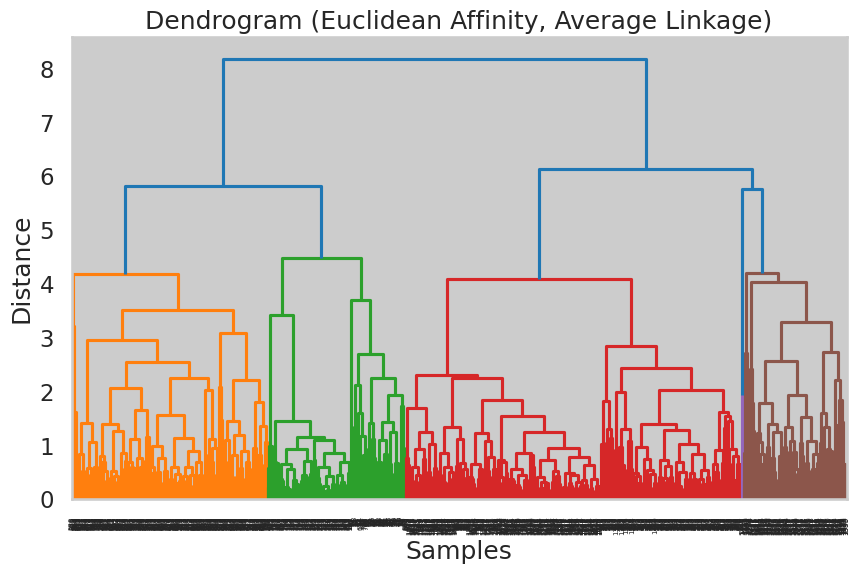

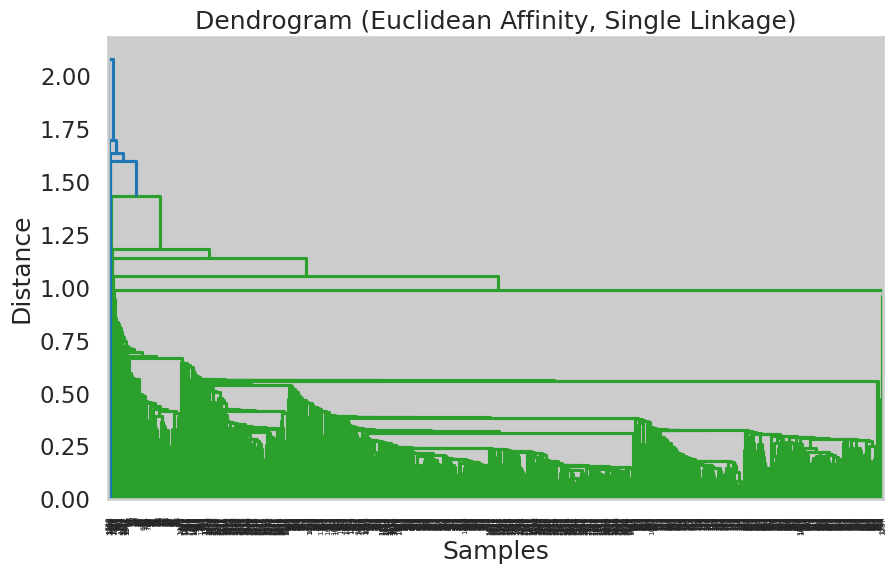

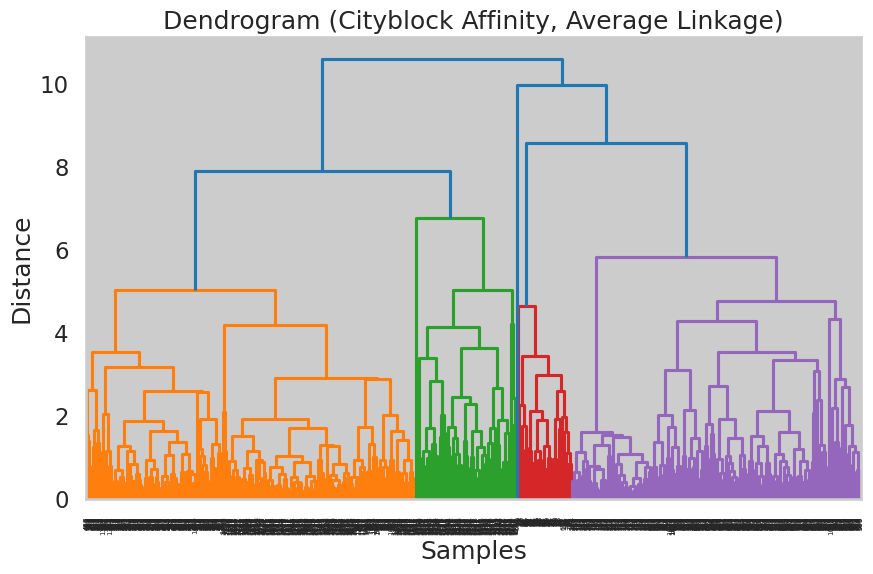

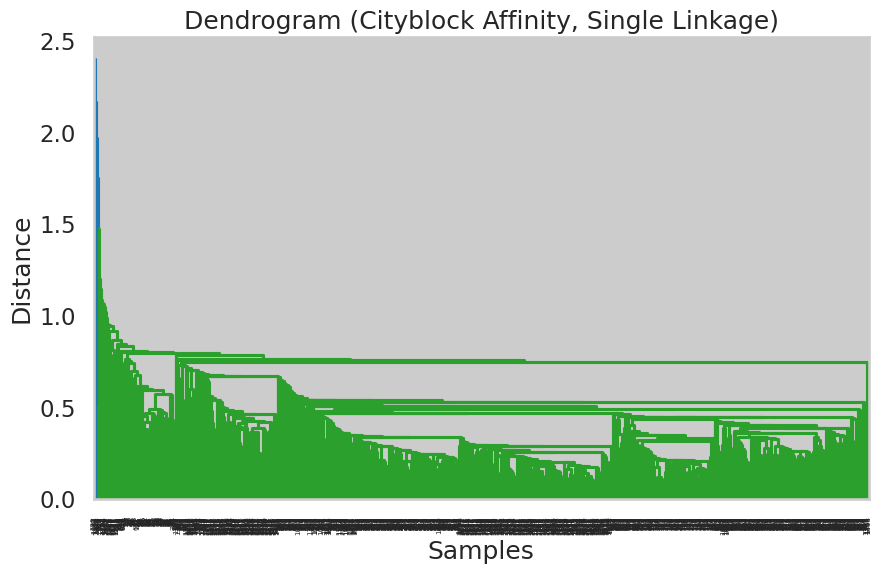

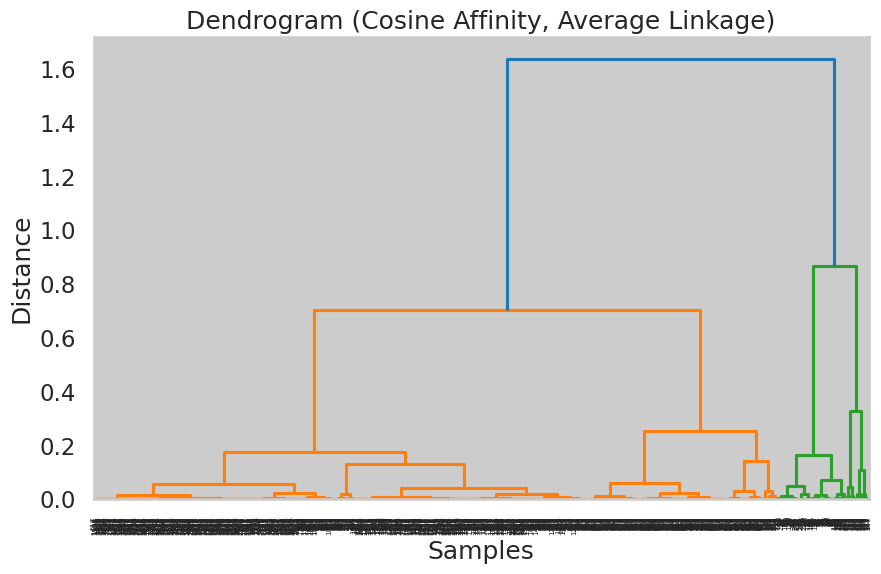

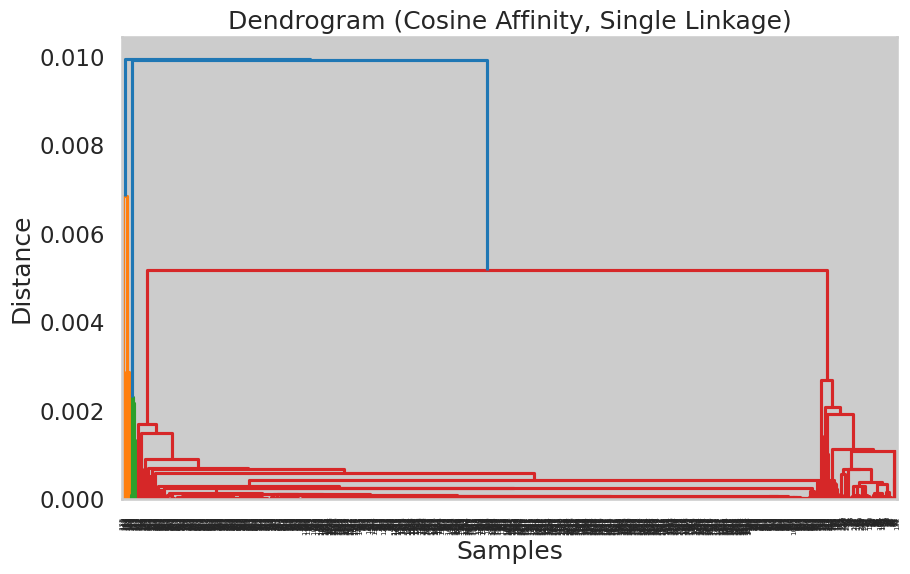

Best Silhouette Score: 0.4716908069861964
Best Parameters: euclidean Affinity, average Linkage, None Distance Threshold


In [12]:
hclustering(Multi_blob_Data)

### DBScan
* Use DBScan function to  to cluster the above data
* In the  DBscan change the following parameters
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques.
* Record your observations and comments

In [15]:
def dbscan(data):
  # Define the range of EPS and min_samples values to explore
  EPS_range = np.linspace(0.1, 3, 10)
  min_samples_range = range(5, 26)

  # Initialize lists to store silhouette scores and observations
  silhouette_scores_3 = []
  observations = []

  # Loop through different parameter combinations
  for eps in EPS_range:
      for min_samples in min_samples_range:
          # Perform DBSCAN clustering
          dbscan = DBSCAN(eps=eps, min_samples=min_samples)
          clusters = dbscan.fit_predict(data)

          # Calculate silhouette score
          if len(np.unique(clusters)) > 1:  # Silhouette score requires at least 2 clusters
              score = silhouette_score(data, clusters)
          else:
              score = -1  # Set score to -1 if only one cluster formed

          silhouette_scores_3.append(score)

          # Record observations
          observations.append({
              'EPS': eps,
              'Min Samples': min_samples,
              'Silhouette Score': score,
              'Clusters': clusters
          })

  # Convert observations to DataFrame for easier analysis
  observations_df = pd.DataFrame(observations)

  # Plot silhouette score versus EPS and min_samples
  plt.figure(figsize=(12, 6))
  for min_samples in min_samples_range:
      scores = observations_df[observations_df['Min Samples'] == min_samples]
      plt.plot(scores['EPS'], scores['Silhouette Score'], label=f"Min Samples = {min_samples}")
  plt.title('Silhouette Score vs EPS for Different Min Samples')
  plt.xlabel('EPS')
  plt.ylabel('Silhouette Score')
  plt.legend()
  plt.grid(True)
  plt.show()

  plt.figure(figsize=(12, 6))
  for eps in EPS_range:
      scores = observations_df[observations_df['EPS'] == eps]
      plt.plot(scores['Min Samples'], scores['Silhouette Score'], label=f"EPS = {eps}")
  plt.title('Silhouette Score vs Min Samples for Different EPS')
  plt.xlabel('Min Samples')
  plt.ylabel('Silhouette Score')
  plt.legend()
  plt.grid(True)
  plt.show()

  # Find the parameters with the best silhouette score
  best_score_index = np.argmax(silhouette_scores_3)
  best_params = observations[best_score_index]

  print("Best Silhouette Score:", best_params['Silhouette Score'])
  print("Best Parameters: EPS =", best_params['EPS'], ", Min Samples =", best_params['Min Samples'])

  # Plot clusters for the best parameters
  best_clusters = best_params['Clusters']
  plt.figure(figsize=(8, 6))
  plt.scatter(data[:, 0], data[:, 1], c=best_clusters, cmap='viridis', s=50, alpha=0.7)
  plt.title('DBSCAN Clustering')
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.colorbar(label='Cluster')
  plt.show()

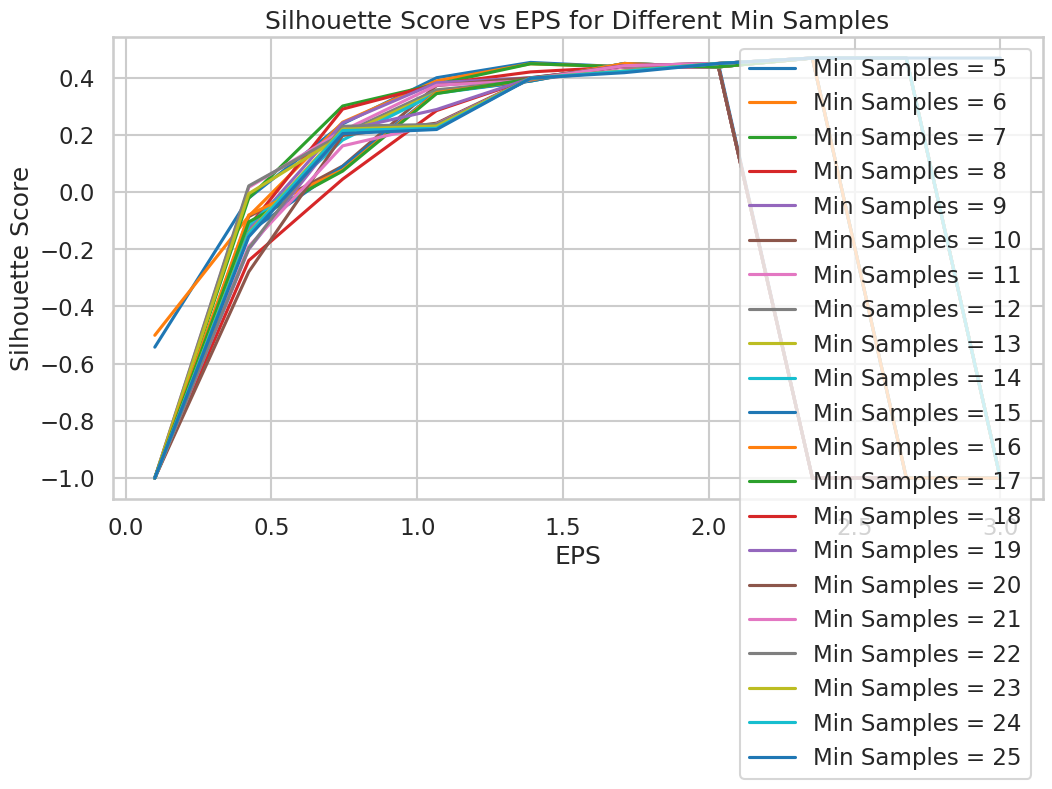

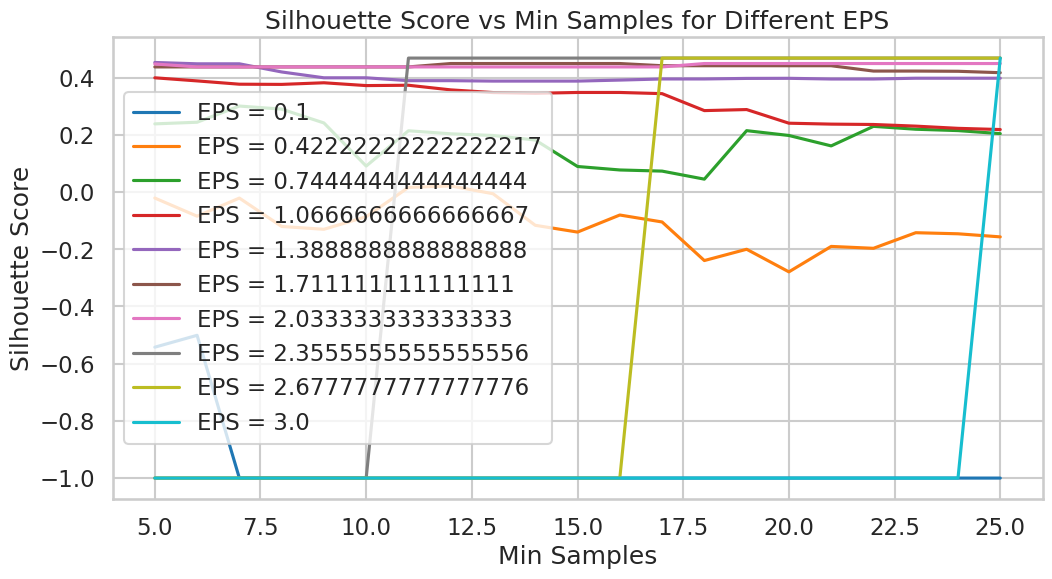

Best Silhouette Score: 0.4685207355522043
Best Parameters: EPS = 2.3555555555555556 , Min Samples = 11


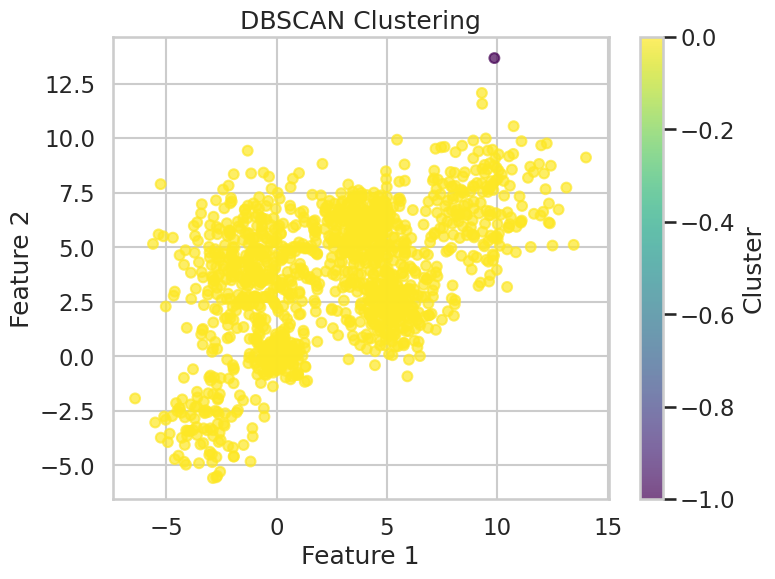

In [16]:
dbscan(Multi_blob_Data)

### Gaussian Mixture
* Use GaussianMixture function to cluster the above data
* In GMM change the covariance_type and check the difference in the resulting proabability fit
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture

In [17]:
from matplotlib.colors import LogNorm
def gaussmix(data):
  # Define parameters
  n_components = 3  # Number of components in the Gaussian Mixture Model
  covariance_types = ['full', 'tied', 'diag', 'spherical']

  # Initialize lists to store GMM models and their probabilities
  gmm_models = []
  gmm_probs = []

  # Fit GMMs with different covariance types
  for cov_type in covariance_types:
      gmm = GaussianMixture(n_components=n_components, covariance_type=cov_type)
      gmm.fit(Multi_blob_Data)
      gmm_models.append(gmm)
      gmm_probs.append(gmm.score_samples(Multi_blob_Data))

  # Plot 2D contour plot for each GMM
  plt.figure(figsize=(15, 10))
  for i, gmm in enumerate(gmm_models):
      plt.subplot(2, 2, i+1)
      x = np.linspace(min(Multi_blob_Data[:,0]), max(Multi_blob_Data[:,0]), 100)
      y = np.linspace(min(Multi_blob_Data[:,1]), max(Multi_blob_Data[:,1]), 100)
      X, Y = np.meshgrid(x, y)
      XX = np.array([X.ravel(), Y.ravel()]).T
      Z = -gmm.score_samples(XX)
      Z = Z.reshape(X.shape)
      plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], s=5, color='black', alpha=0.5)
      plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                  levels=np.logspace(0, 3, 10))
      plt.title(f'GMM Contour Plot (Covariance Type: {covariance_types[i]})')
      plt.xlabel('Feature 1')
      plt.ylabel('Feature 2')
  plt.tight_layout()
  plt.show()

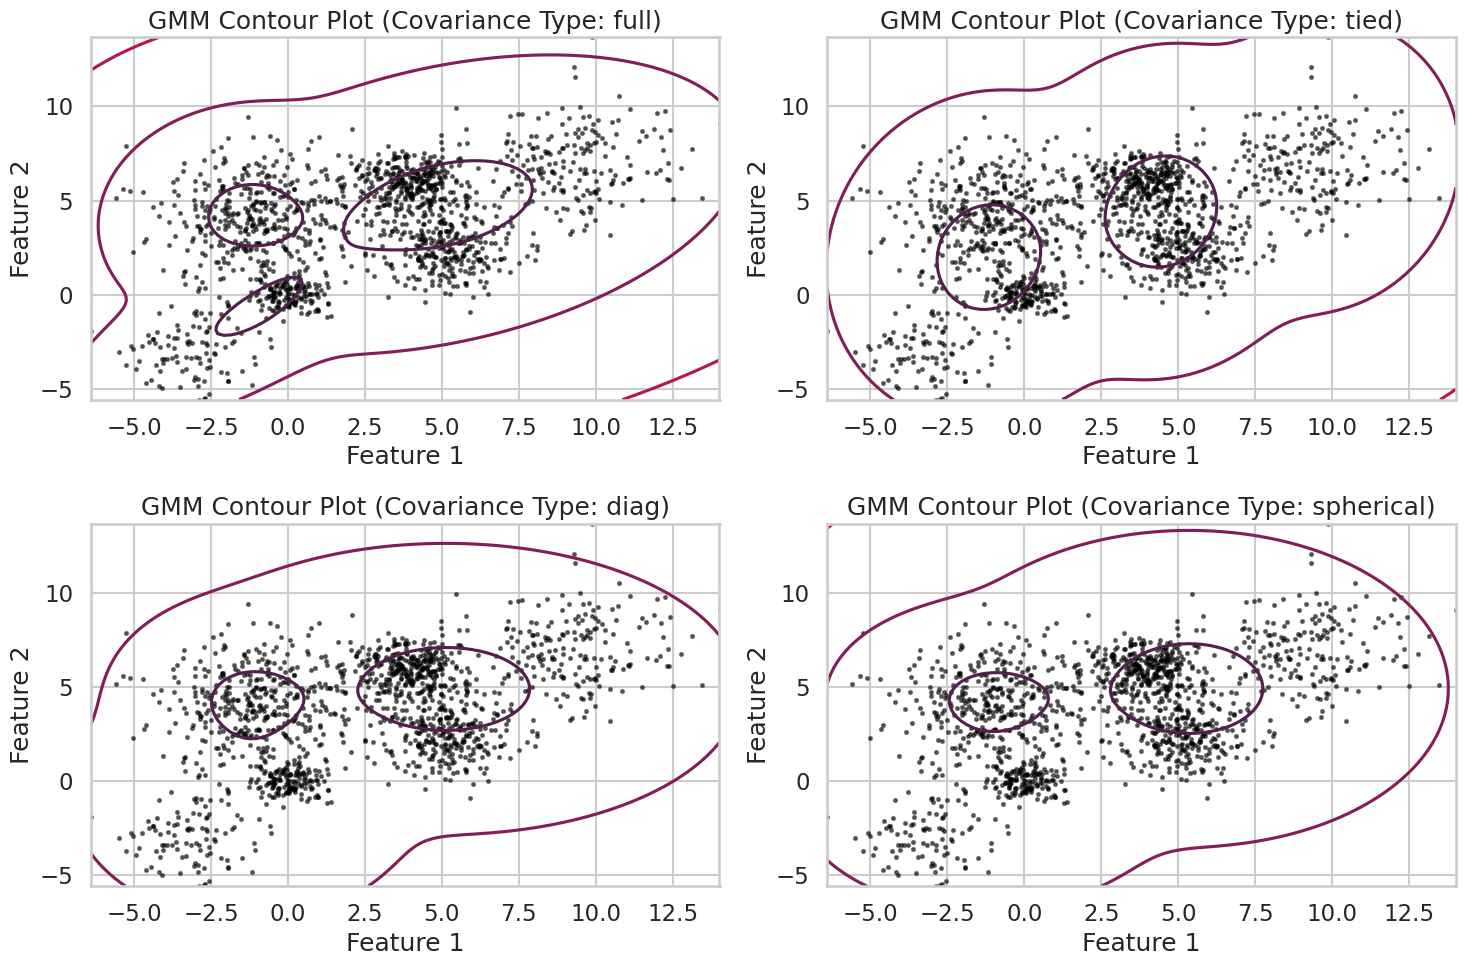

In [18]:
gaussmix(Multi_blob_Data)

## iris data set
The iris data set is test data set that is part of the Sklearn module
which contains 150 records each with 4 features. All the features are represented by real numbers

The data represents three classes


In [19]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']


['setosa', 'versicolor', 'virginica']

* Repeat all the above clustering approaches and steps on the above data
* Normalize the data then repeat all the above steps
* Compare between the different clustering approaches

In [28]:
X = iris_data.data  # Features

# Normalize the data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

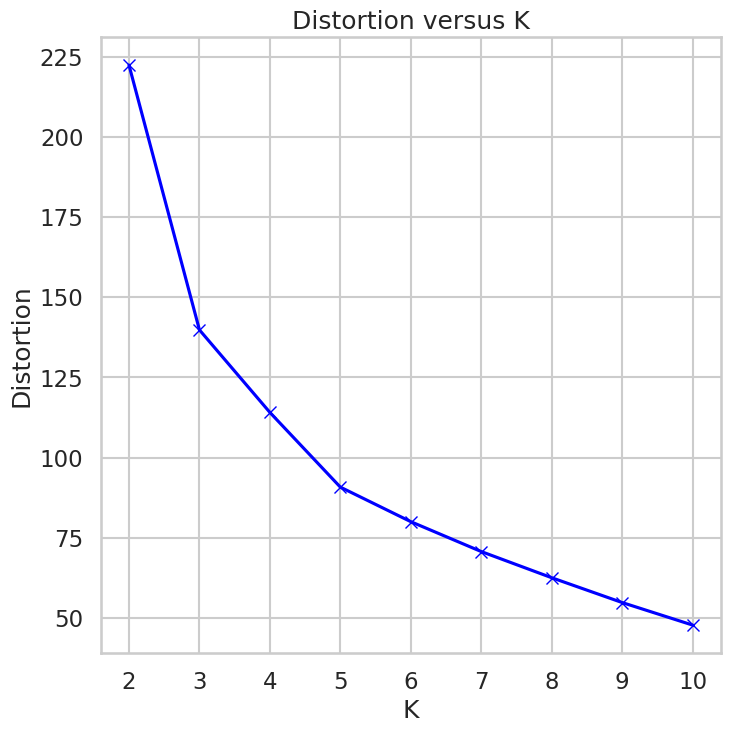

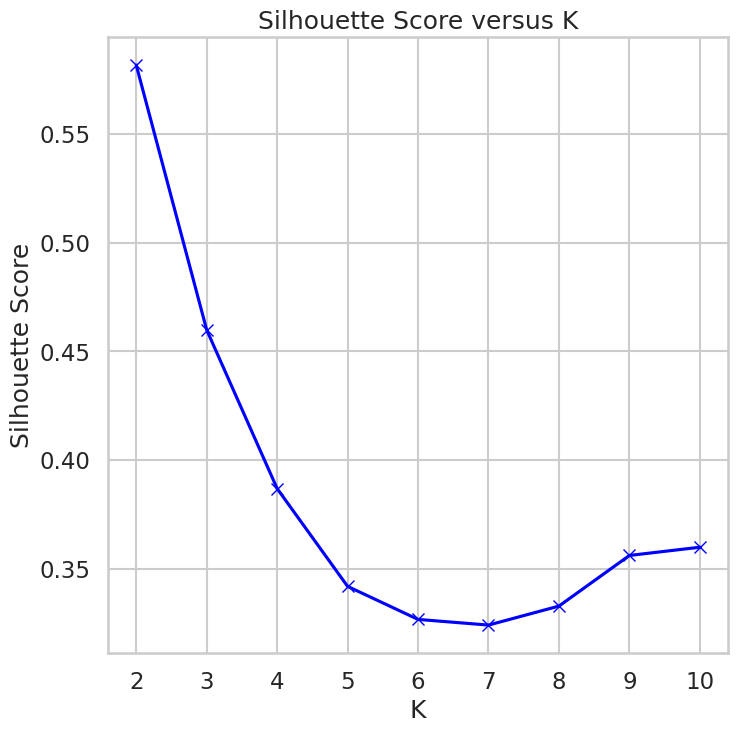

In [40]:
kmeans(X_normalized)

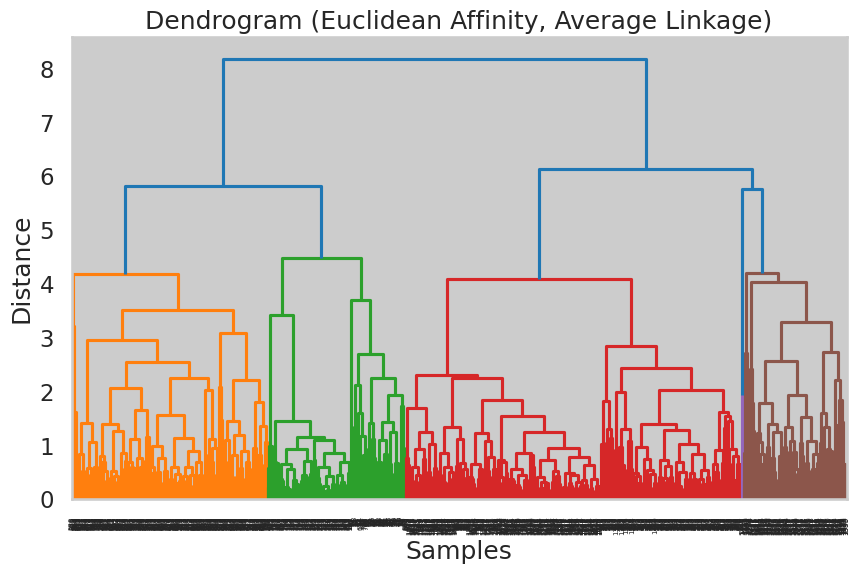

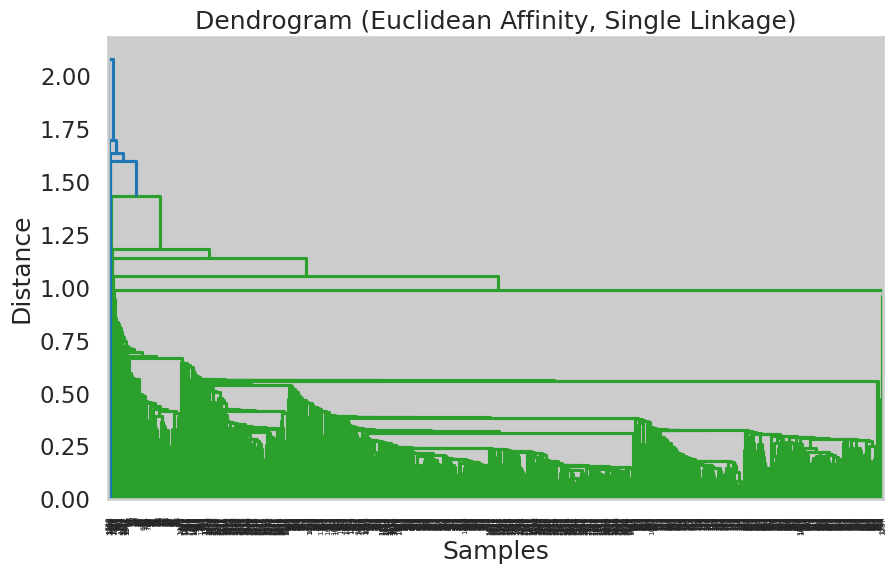

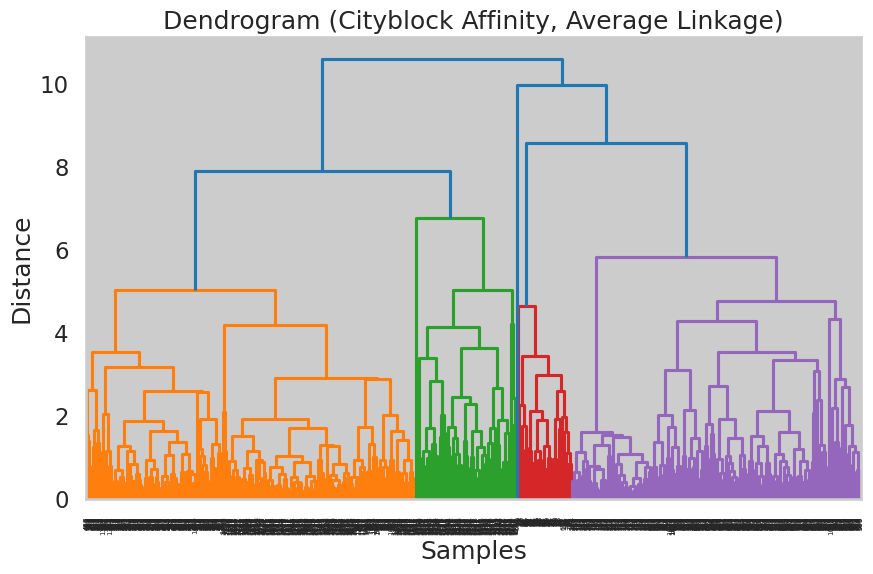

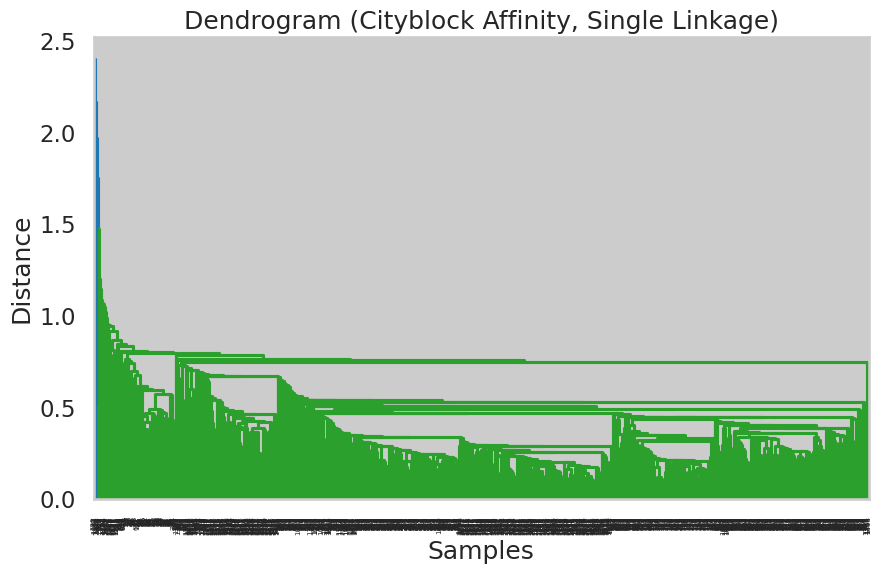

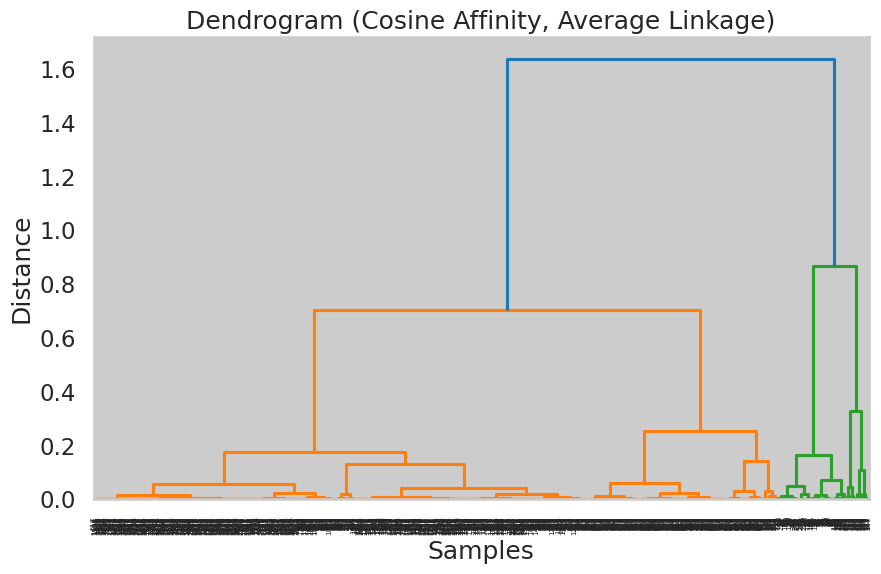

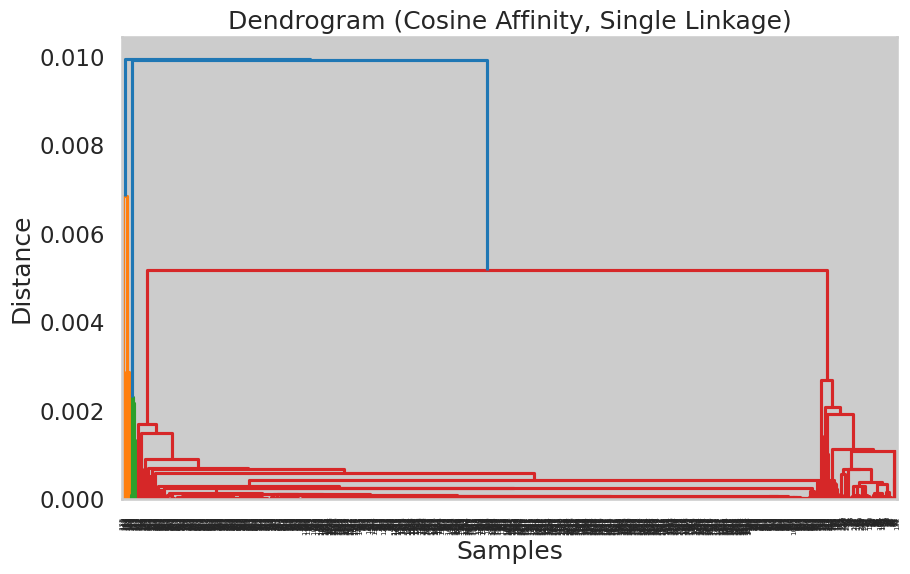

Best Silhouette Score: 0.5817500491982808
Best Parameters: euclidean Affinity, average Linkage, None Distance Threshold


In [41]:
hclustering(X_normalized)

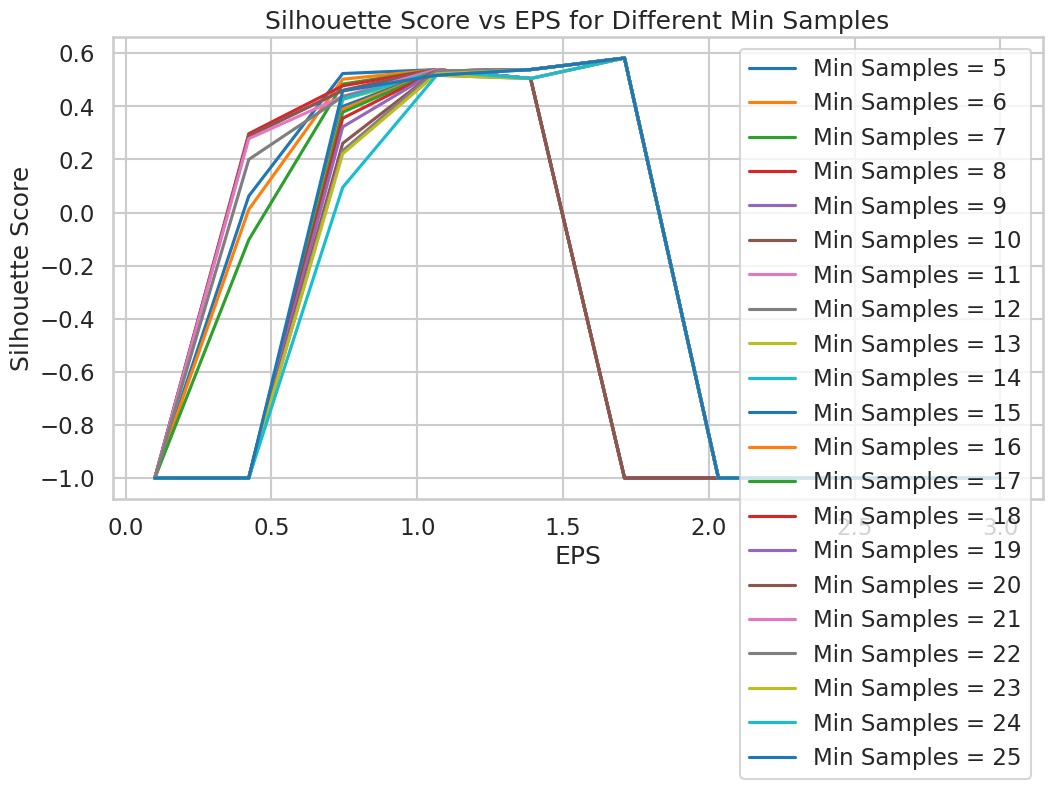

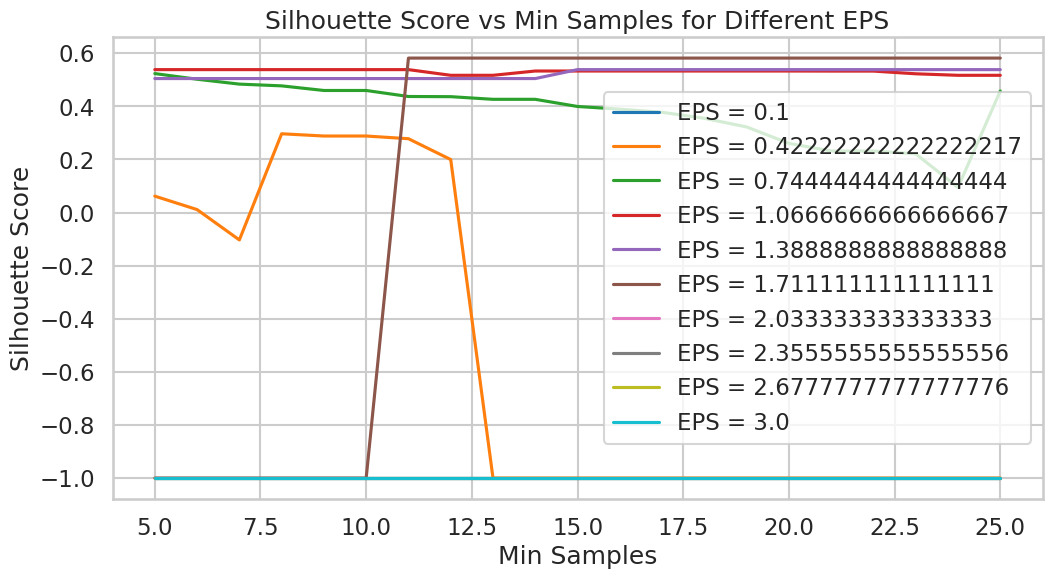

Best Silhouette Score: 0.5817500491982808
Best Parameters: EPS = 1.711111111111111 , Min Samples = 11


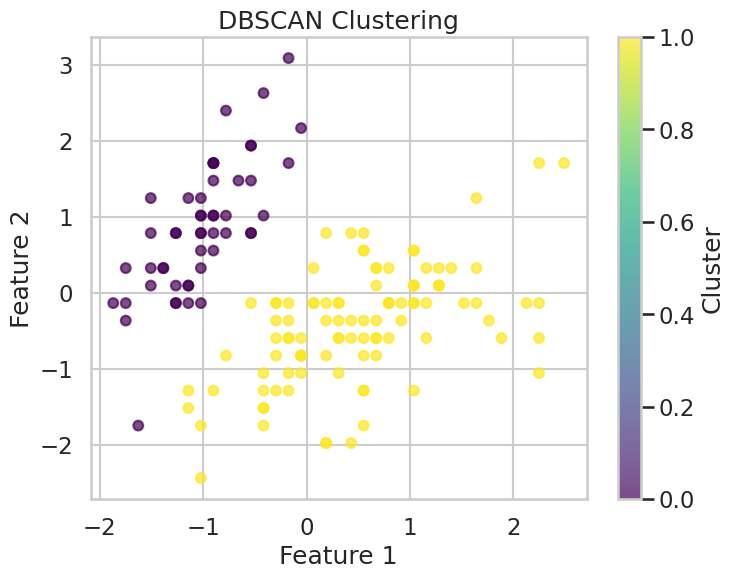

In [42]:
dbscan(X_normalized)

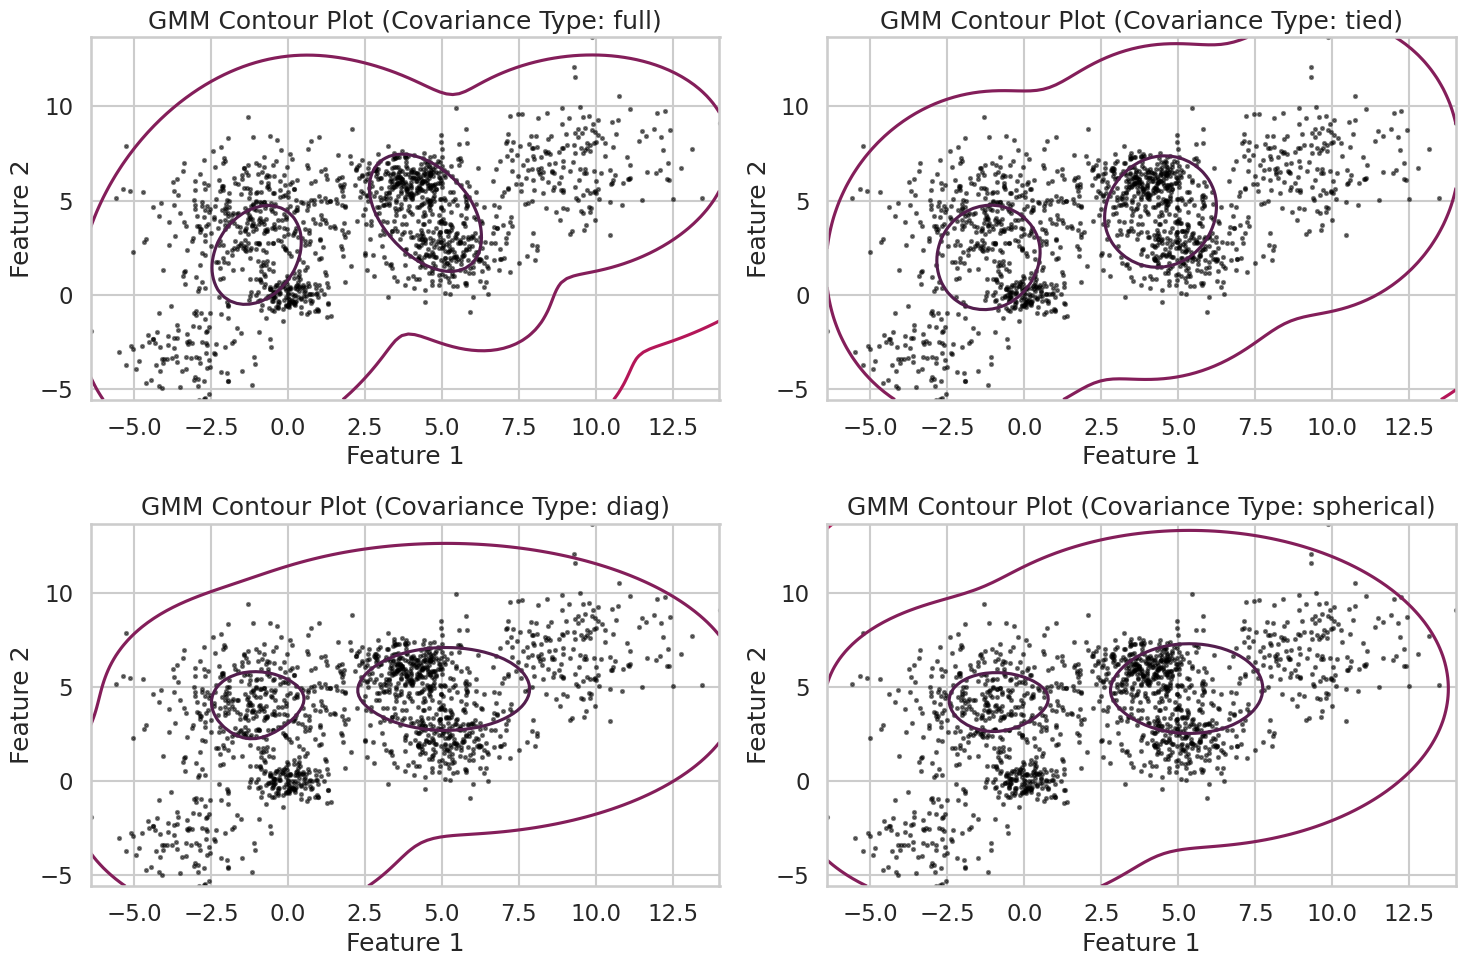

In [43]:
gaussmix(X_normalized)

## Customer dataset
Repeat all the above on the customer data set

In [33]:
# Load the customer dataset (replace 'customer_data.csv' with the actual filename)
customer_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Customer data.csv', index_col=0)

# Extract relevant features for clustering
X_customer = customer_data.values


7

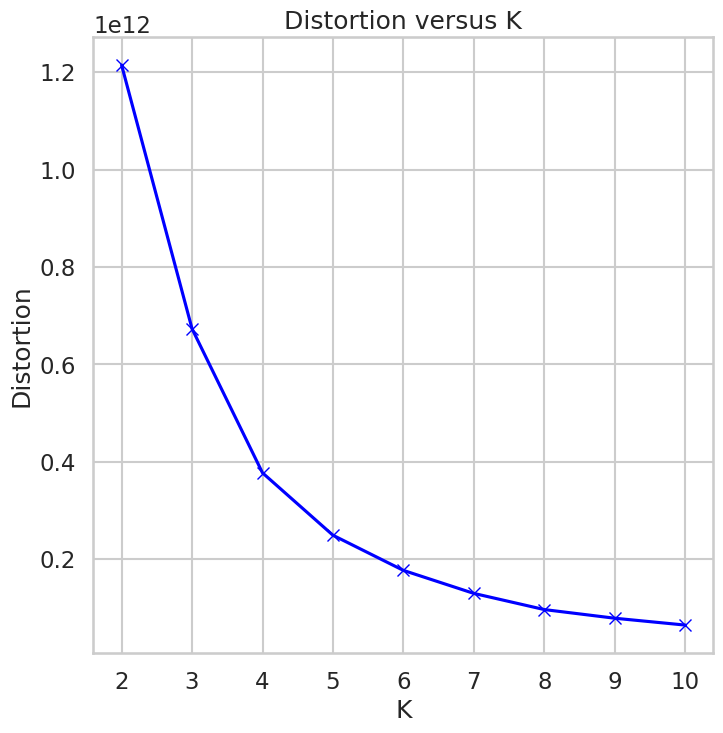

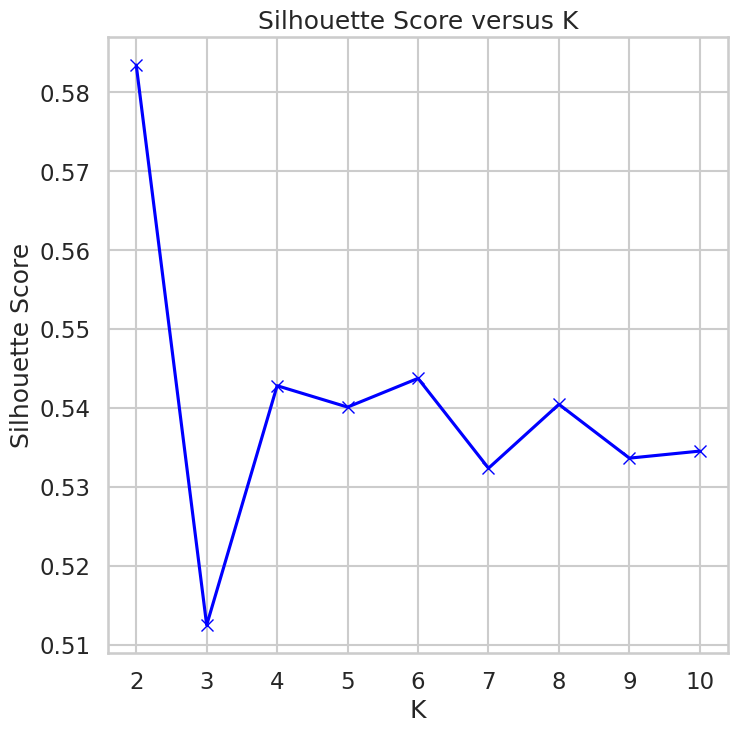

In [44]:
kmeans(X_customer)

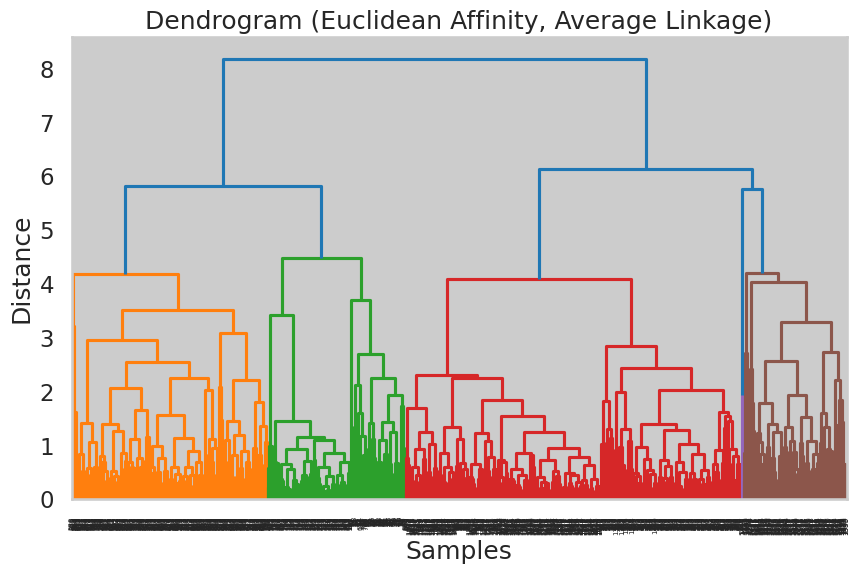

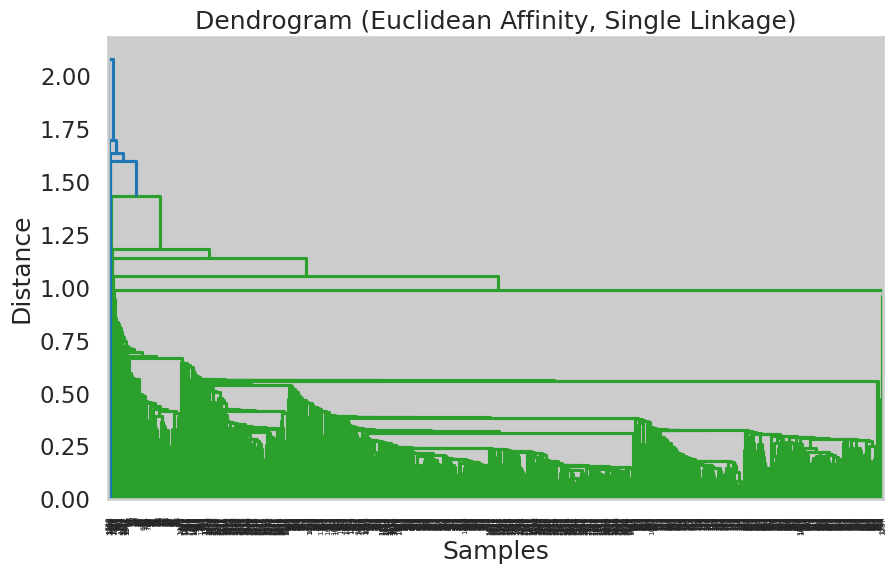

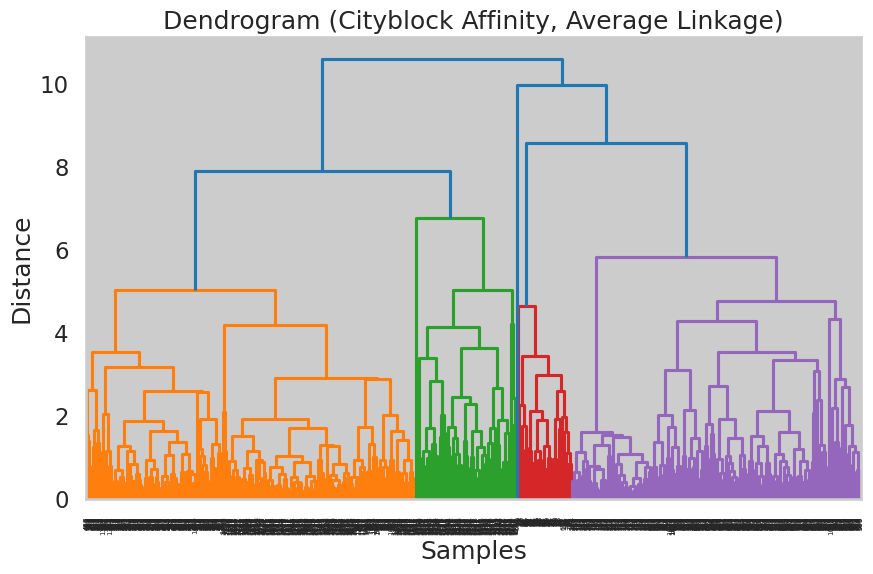

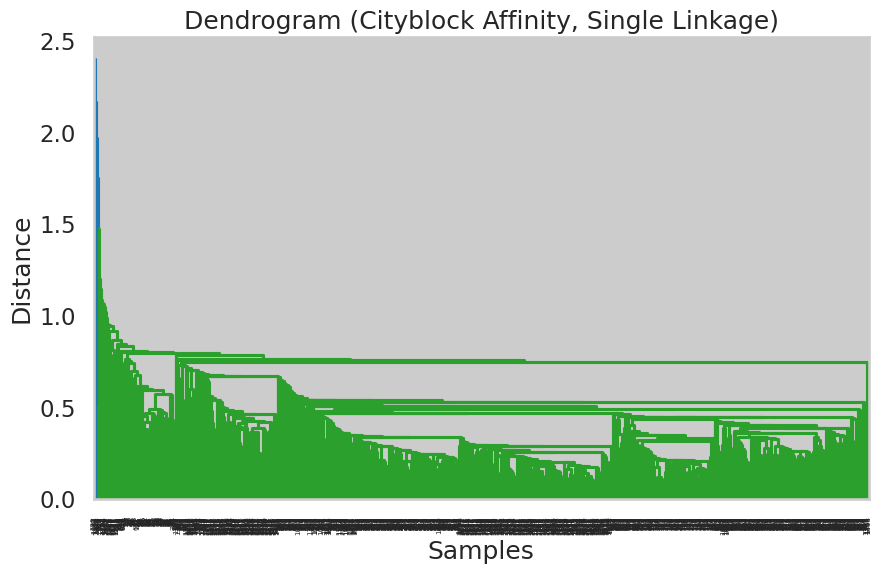

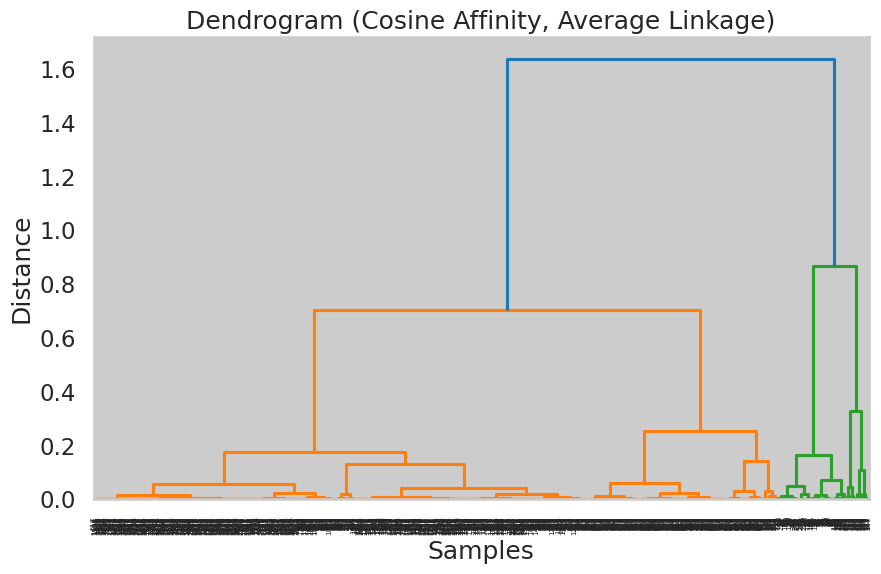

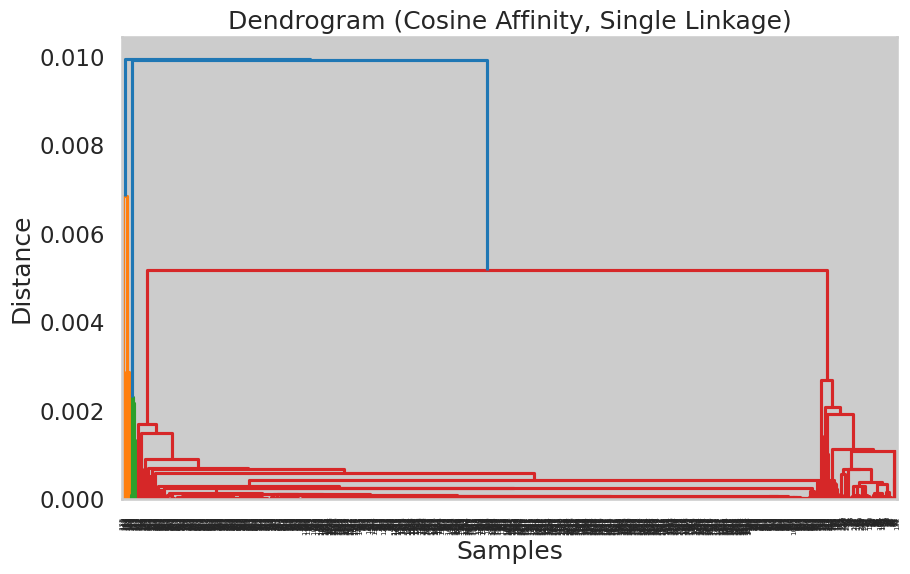

Best Silhouette Score: 0.7585682251361909
Best Parameters: euclidean Affinity, single Linkage, None Distance Threshold


In [45]:
hclustering(X_customer)

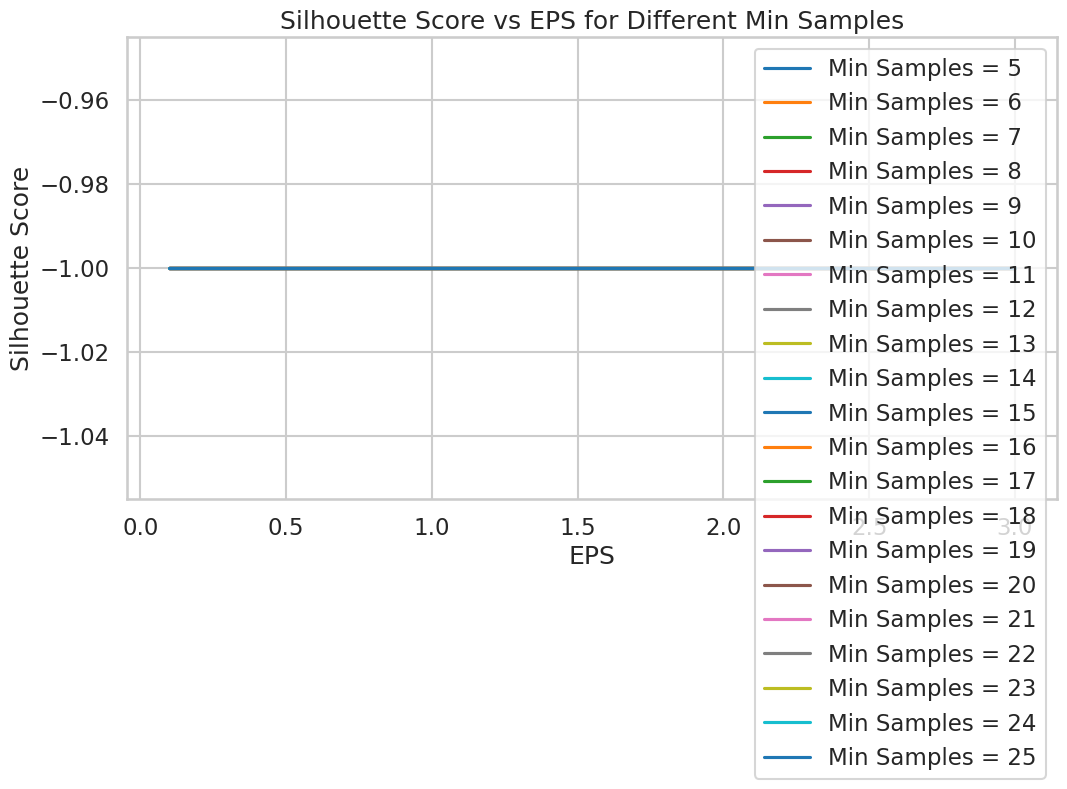

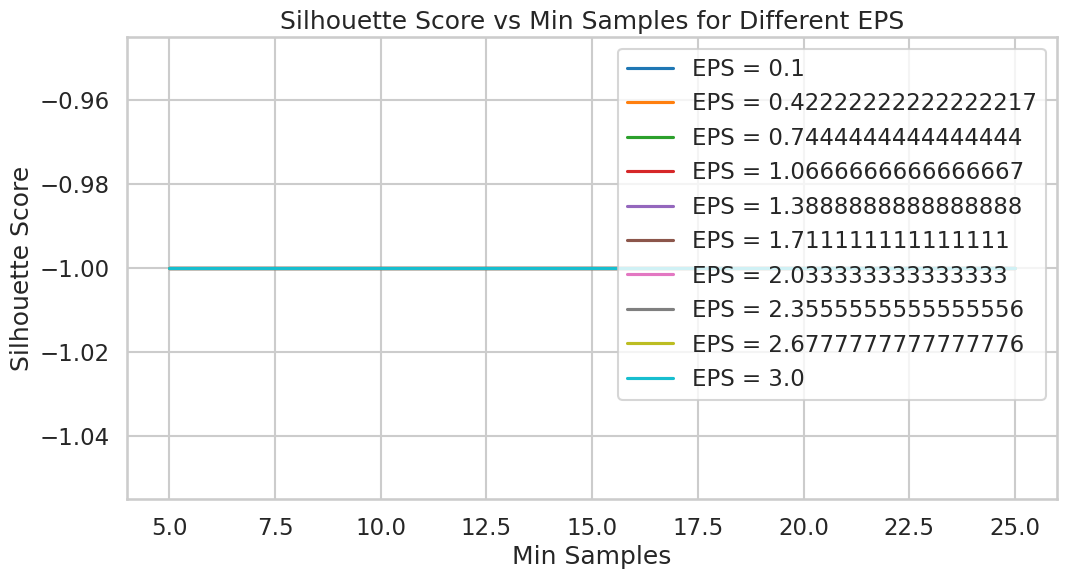

Best Silhouette Score: -1
Best Parameters: EPS = 0.1 , Min Samples = 5


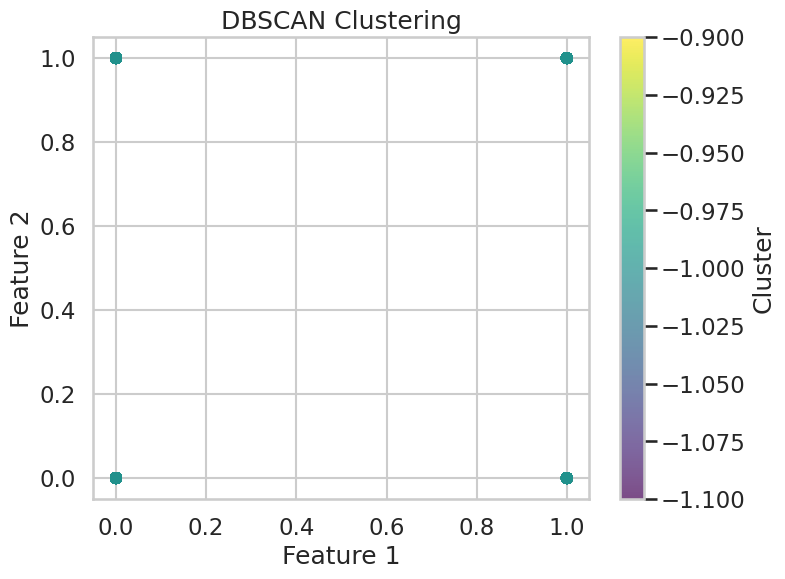

In [46]:
dbscan(X_customer)

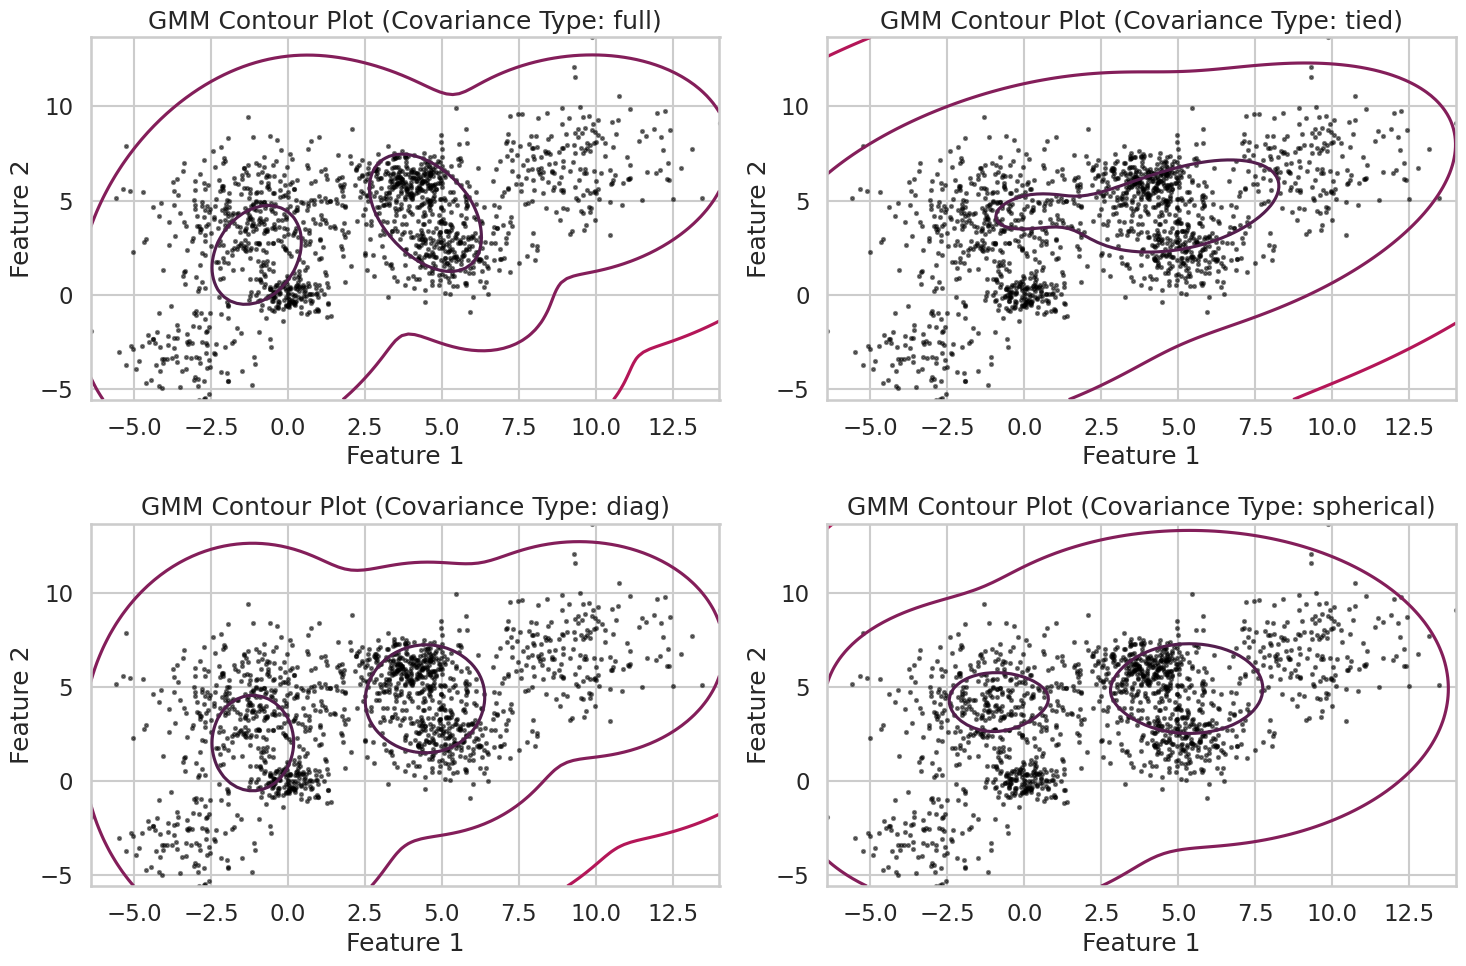

In [47]:
gaussmix(X_customer)